In [1]:
from pycaret.datasets import get_data
from pycaret.regression import *
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.utils import check_metric

In [2]:
df = get_data("diamond")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
df.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


<AxesSubplot:>

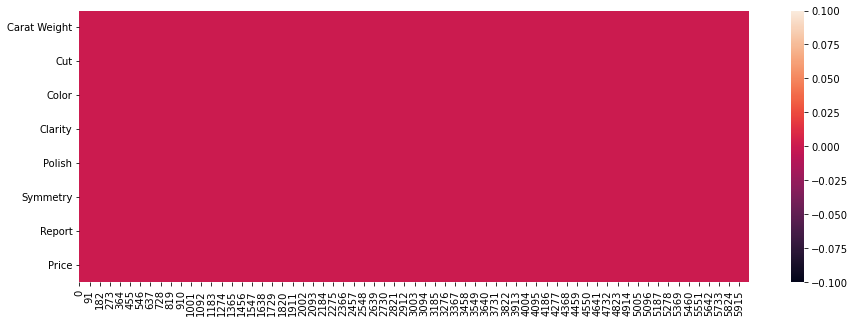

In [4]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.isna().transpose())

In [5]:
df_train = df.sample(frac=0.7) # splitting train and test data

In [6]:
df_test = df.drop(df_train.index)

In [7]:
print(f"Shape of training data:{df_train.shape}")
print(f"Shape of testing data:{df_test.shape}")

Shape of training data:(4200, 8)
Shape of testing data:(1800, 8)


In [8]:
df_train.reset_index(inplace=True, drop=True)

In [9]:
df_test.reset_index(inplace=True, drop=True)


In [10]:
df_test.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,0.85,Ideal,H,SI1,EX,EX,GIA,3183
1,0.91,Ideal,E,SI1,VG,VG,GIA,4370
2,1.00,Very Good,D,SI1,VG,G,GIA,5747
3,1.05,Very Good,E,VS1,VG,G,GIA,7666
4,2.20,Ideal,H,VS2,EX,VG,GIA,22241


Text(0.5, 1.03, 'Diamond Carat Weight/Price correlation')

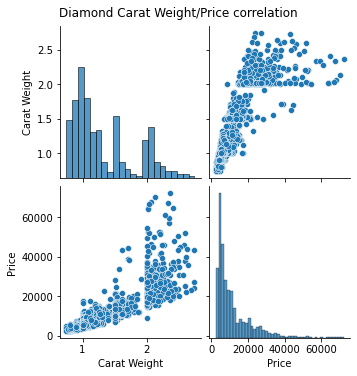

In [11]:
plot = sns.pairplot(df_test)
plot.fig.suptitle("Diamond Carat Weight/Price correlation",y=1.03)

In [12]:
df_train.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.07,Ideal,H,VS2,VG,EX,GIA,5889
1,0.83,Ideal,G,VS2,EX,EX,GIA,3849
2,0.90,Very Good,D,VS1,EX,VG,GIA,5969
3,2.00,Good,F,SI1,EX,EX,GIA,18069
4,0.91,Very Good,I,SI1,G,G,GIA,3170


In [13]:
reg0 = setup(data=df_train, target="Price", session_id=123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(4200, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2939, 28)"


In [14]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,743.5472,3188383.2504,1691.3738,0.9708,0.0794,0.0586,0.5220
rf,Random Forest Regressor,769.7247,3432319.1739,1760.5903,0.9682,0.0813,0.0593,0.4340
lightgbm,Light Gradient Boosting Machine,790.3952,3914125.8957,1850.5111,0.9642,0.0809,0.0587,0.0620
gbr,Gradient Boosting Regressor,899.1578,3873655.3869,1887.6240,0.9633,0.0974,0.0740,0.1320
dt,Decision Tree Regressor,984.6428,4613594.2294,2093.7715,0.9559,0.1065,0.0774,0.0210
ridge,Ridge Regression,2440.5097,14428237.2038,3736.0461,0.8604,0.6310,0.2846,0.0200
br,Bayesian Ridge,2438.1039,14427384.9226,3735.8139,0.8604,0.6333,0.2843,0.0410
lasso,Lasso Regression,2435.2825,14450134.2869,3737.7778,0.8603,0.6324,0.2837,0.0540
lr,Linear Regression,2436.9384,14446338.4591,3738.6726,0.8602,0.6289,0.2844,1.9600
llar,Lasso Least Angle Regression,2388.4060,14492782.0339,3739.7967,0.8602,0.6396,0.2719,0.0070


In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [16]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,589.4069,1061417.4188,1030.2511,0.9867,0.0736,0.0555
1,852.9671,3593580.7686,1895.6742,0.9657,0.0793,0.0572
2,753.4410,2381324.5000,1543.1541,0.9746,0.0814,0.0609
3,596.2740,814983.8878,902.7646,0.9890,0.0733,0.0565
4,851.8720,7674540.0405,2770.2960,0.9394,0.0851,0.0570
5,693.2486,1597263.0983,1263.8287,0.9806,0.0775,0.0581
6,735.2437,1670068.4797,1292.3113,0.9828,0.0823,0.0617
7,828.8225,4329435.2450,2080.7295,0.9622,0.0844,0.0633
8,719.5029,3030543.7807,1740.8457,0.9706,0.0736,0.0543
9,814.6929,5730675.2847,2393.8829,0.9558,0.0830,0.0612


In [17]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,758.3549,2057966.6280,1434.5615,0.9743,0.0875,0.0674
1,1007.1431,3711850.2246,1926.6163,0.9646,0.0989,0.0710
2,812.4661,1968287.9096,1402.9568,0.9790,0.0956,0.0741
3,861.4661,2386731.2052,1544.9049,0.9677,0.0996,0.0774
4,1116.8560,9053556.5281,3008.9128,0.9285,0.1032,0.0731
5,913.5910,3309300.8362,1819.1484,0.9597,0.0941,0.0737
6,895.3903,2266426.8192,1505.4656,0.9767,0.0986,0.0757
7,1058.6423,5069927.1101,2251.6499,0.9558,0.1125,0.0871
8,980.4040,5219132.9064,2284.5422,0.9494,0.0988,0.0758
9,1032.4262,10972806.9204,3312.5227,0.9154,0.1051,0.0749


In [18]:
pred = predict_model(tuned_et, data=df_test)

In [19]:
pred

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,0.85,Ideal,H,SI1,EX,EX,GIA,3183,3735.487962
1,0.91,Ideal,E,SI1,VG,VG,GIA,4370,4375.874003
2,1.00,Very Good,D,SI1,VG,G,GIA,5747,5520.568196
3,1.05,Very Good,E,VS1,VG,G,GIA,7666,7794.066065
4,2.20,Ideal,H,VS2,EX,VG,GIA,22241,23732.806751
...,...,...,...,...,...,...,...,...,...
1795,0.90,Very Good,G,SI1,EX,VG,GIA,4320,3878.027180
1796,1.13,Ideal,F,VS2,EX,EX,GIA,8157,7790.532028
1797,2.03,Very Good,H,VS2,VG,G,GIA,18866,20856.905798
1798,0.81,Very Good,D,VVS2,VG,VG,GIA,5423,4627.980809


In [ ]:
check_metric(pred["Price"], pred["Label"], metric="Accuracy")

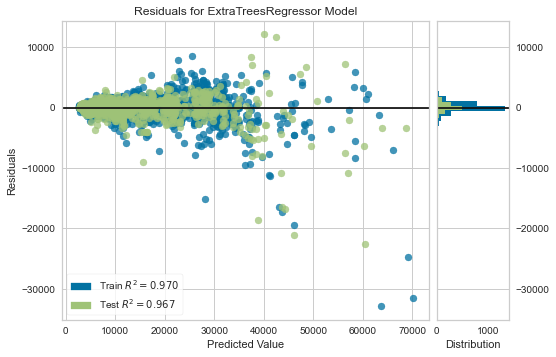

In [ ]:
plot_model(tuned_et)

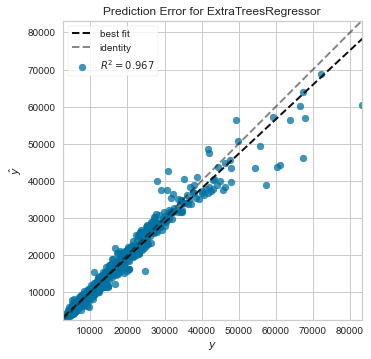

In [ ]:
plot_model(tuned_et, plot='error')

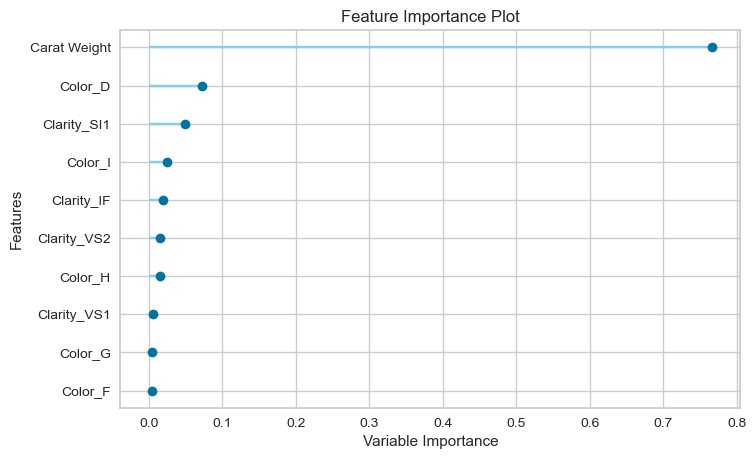

In [ ]:
plot_model(tuned_et, plot='feature')

In [ ]:
save_model(tuned_et, "regression_diamond_model_extra_tree")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=9,
                                      max_features=1.0, max_leaf_nodes=None,
                                      max_samples=None,
                                      min_i